In [11]:
# prompt: unzip Emotion-Dataset in temporary storage

import zipfile
import os

zip_ref=zipfile.ZipFile('./Emotion-dataset.zip')
zip_ref.extractall('./')
zip_ref.close()


In [12]:
from __future__ import print_function
import tensorflow as tf  # Import TensorFlow
from tensorflow import keras # Import Keras from TensorFlow
# from keras.preprocessing.image import ImageDataGenerator # Incorrect import removed
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use tf.keras for ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import os

num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 16

train_data_dir = './fer2013/train'
validation_data_dir = './fer2013/validation'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=5,
      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        color_mode = 'grayscale',
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [13]:
validation_set=validation_generator

In [18]:
from keras.models import Sequential
#from keras.layers.normalization import BatchNormalization # This is outdated
from keras.layers import BatchNormalization # Now in keras.layers
from keras.layers import Conv2D, MaxPooling2D # These remain in keras.layers.convolutional
#from keras.layers.advanced_activations import ELU # Deprecated, use keras.layers
#from keras.layers.core import Activation, Flatten, Dropout, Dense # Deprecated, use keras.layers
from keras.layers import ELU, Activation, Flatten, Dropout, Dense  # Import directly from keras.layers

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

In [20]:
# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [21]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])


In [23]:
nb_train_samples = 28273
nb_validation_samples = 3534
epochs = 70

history = model.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.6384 - loss: 0.9998 - val_accuracy: 0.5196 - val_loss: 1.4086
Epoch 2/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.6586 - loss: 0.9907 - val_accuracy: 0.4493 - val_loss: 1.7904
Epoch 3/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.6457 - loss: 0.9829 - val_accuracy: 0.5588 - val_loss: 1.3414
Epoch 4/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.6497 - loss: 1.0102 - val_accuracy: 0.6377 - val_loss: 1.1776
Epoch 5/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.6521 - loss: 0.9718 - val_accuracy: 0.5551 - val_loss: 1.3404
Epoch 6/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step - accuracy: 0.6897 - loss: 0.9450 - val_accuracy: 0.5652 - val_loss: 1.1784
Epoch 7/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.6569 - loss: 0.9626 - val_accuracy: 0.5645 - val_loss: 1.3420
Epoch 8/70
1767/1767 ━━━━━━━━━━━━━━━━━━━━ 1s 335us/step - accuracy: 0.6697 -

In [24]:
#saving the network

model_json = model.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [54]:
# # saving the weights
# model.save_weights('network_emotions.weights.h5')
# print("Model weights saved.")

ValueError: The filename must end in `.weights.h5`. Received: filepath=network_emotionsweight.h5

In [4]:
# saving the weight of model
from numpy import loadtxt
from tensorflow import keras
# Load the JSON file containing the model architecture
with open('network_emotions.json', 'r') as json_file:
    loaded_model_json = json_file.read()

# Create the model from the JSON
model = keras.models.model_from_json(loaded_model_json)

# Load the weights into the model
model.load_weights('network_emotions.weights.h5')
print("Loaded model from disk")

Loaded model from disk


In [14]:
# prompt: make predictions using above validation dataset

# Make predictions using the validation dataset
predictions = model.predict(validation_generator)

# Print the predictions (optional)
predictions

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step


array([[5.0848716e-01, 4.9184507e-04, 4.7372088e-02, ..., 5.0838418e-02,
        3.9050138e-01, 1.4301508e-03],
       [7.7124685e-01, 1.4821032e-01, 4.0021390e-02, ..., 1.5344717e-02,
        1.9720420e-02, 3.3770802e-03],
       [9.2515957e-01, 3.8000834e-04, 6.6210449e-02, ..., 8.3097047e-04,
        1.8962459e-03, 2.0814301e-03],
       ...,
       [1.8853186e-01, 2.1755861e-03, 1.9588789e-02, ..., 7.5951754e-03,
        4.4524863e-02, 7.2655245e-04],
       [7.1116583e-03, 6.6083310e-05, 2.0670366e-01, ..., 2.2872256e-03,
        4.7981958e-03, 7.7640355e-01],
       [9.7826853e-02, 1.8460529e-04, 8.7629534e-02, ..., 4.3012124e-02,
        7.6846403e-01, 1.0956111e-03]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


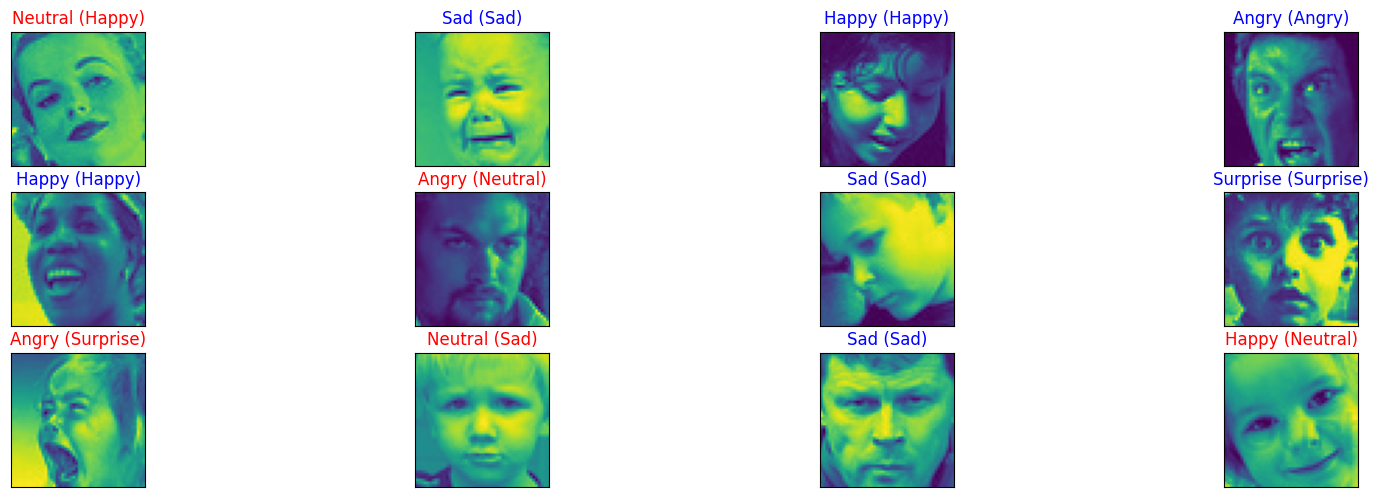

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# define text labels
m_labels = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']

# Reset the validation_generator to ensure you are starting from the beginning
validation_generator.reset()

# Get the total number of samples in the validation set
num_samples = len(validation_generator.filenames)

# Generate random indices for selecting images
random_indices = np.random.choice(num_samples, size=12, replace=False)

# Plot the selected images
fig = plt.figure(figsize=(20, 8))

# Use enumerate and next to get batches and index into them
for i, (batch_x, batch_y) in enumerate(validation_generator):
    # Only process if we have enough samples processed
    if i >= len(random_indices):
        break

    # Access the image and true label using the random index within the batch
    idx = random_indices[i] # Getting the random index for current iteration
    image = batch_x[idx % validation_generator.batch_size]
    true_label = np.argmax(batch_y[idx % validation_generator.batch_size])

    # Make prediction for the current image
    pred_idx = np.argmax(model.predict(np.expand_dims(image, axis=0)))

    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(image)  # Assuming image is already in the correct format for imshow

    # Use true_label instead of true_idx
    ax.set_title("{} ({})".format(m_labels[pred_idx], m_labels[true_label]),
                 color=("blue" if pred_idx == true_label else "red"))

plt.show()

# using real image


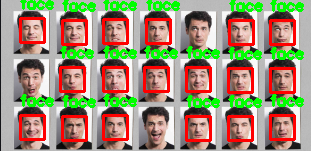

In [7]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
# face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
input=cv2.imread('sampleexpressions.png')
input = cv2.resize(input, (input.shape[1] // 2, input.shape[0] // 2))
# cv2_imshow(input)

gray_image=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)
# gray_image
# cv2_imshow(gray_image)
body_model=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
bodys=body_model.detectMultiScale(gray_image,scaleFactor=1.5, minNeighbors=3)
import numpy as np
for (i, rect) in enumerate(bodys):
    x,y,w,h=rect
    #draw a rectangle
    cv2.rectangle(input, (x, y), (x + w, y + h), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(input, 'face', (x, y - 10), font, 0.5, (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


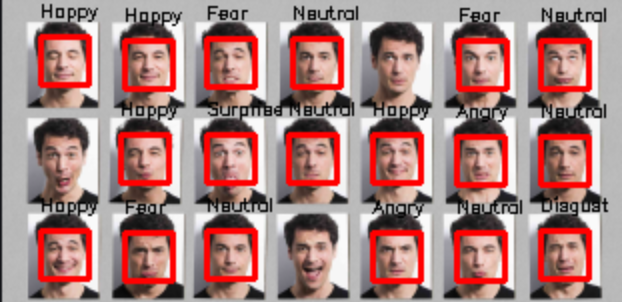

In [10]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
# face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
input=cv2.imread('sampleexpressions.png')
input = cv2.resize(input, (input.shape[1] // 2, input.shape[0] // 2))
# cv2_imshow(input)

gray_image=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)
# gray_image
# cv2_imshow(gray_image)
body_model=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
bodys=body_model.detectMultiScale(gray_image,scaleFactor=1.5, minNeighbors=3)
import numpy as np

predictions = [] # List to store predictions for each face
for (i, rect) in enumerate(bodys):
    x,y,w,h=rect
    #draw a rectangle
    cv2.rectangle(input, (x, y), (x + w, y + h), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    # cv2.putText(input, 'face', (x, y - 10), font, 0.5, (0, 255, 0), 2)

    # Extract the face region from the original image
    face_roi = gray_image[y:y + h, x:x + w]

    # Resize the face ROI to match the model's input shape (48x48)
    resized_face = cv2.resize(face_roi, (48, 48))

    # Reshape and normalize the face ROI to match the model's input format
    # Assuming your model expects a single channel (grayscale) image
    resized_face = resized_face.reshape(1, 48, 48, 1) / 255.0

    # Make prediction on the extracted and preprocessed face
    prediction = model.predict(resized_face)
    predictions.append(prediction) # Append to prediction list
    prediction = np.argmax(prediction)
    cv2.putText(input, m_labels[prediction], (x, y - 10), font, 0.3, (0, 0, 0), 1)

# from google.colab.patches import cv2_imshow
# cv2_imshow(input)
resized_input = cv2.resize(input, (input.shape[1] * 2, input.shape[0] * 2))  # Double the size

cv2_imshow(resized_input)

# Process the predictions (e.g., get the class with highest probability)
# for prediction in predictions:
#     predicted_class = np.argmax(prediction)
#     print(f"Predicted class: {m_labels[predicted_class]}")

In [90]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
image_path = 'sampleexpressions.png'
image = cv2.imread(image_path)



ValueError: too many values to unpack (expected 4)

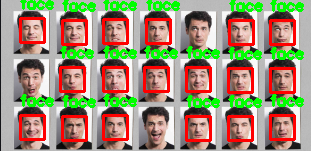

In [100]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
# face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
input=cv2.imread('sampleexpressions.png')
input = cv2.resize(input, (input.shape[1] // 2, input.shape[0] // 2))
# cv2_imshow(input)

gray_image=cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)
# gray_image
# cv2_imshow(gray_image)
body_model=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
bodys=body_model.detectMultiScale(gray_image,scaleFactor=1.5, minNeighbors=3)
import numpy as np
for (i, rect) in enumerate(bodys):
    x,y,w,h=rect
    #draw a rectangle
    model_image=cv2.rectangle(input, (x, y), (x + w, y + h), (0, 0, 255), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(input, 'face', (x, y - 10), font, 0.5, (0, 255, 0), 2)

from google.colab.patches import cv2_imshow
cv2_imshow(input)


array([[[ 24,  20,  19],
        [182, 182, 182],
        [187, 187, 187],
        ...,
        [185, 185, 185],
        [182, 182, 182],
        [184, 184, 184]],

       [[ 24,  20,  19],
        [185, 185, 185],
        [187, 187, 187],
        ...,
        [187, 187, 187],
        [185, 185, 185],
        [184, 184, 184]],

       [[ 24,  20,  19],
        [185, 185, 185],
        [184, 184, 184],
        ...,
        [186, 186, 186],
        [185, 185, 185],
        [187, 187, 187]],

       ...,

       [[ 24,  20,  19],
        [184, 184, 184],
        [185, 185, 185],
        ...,
        [185, 185, 185],
        [185, 185, 185],
        [186, 186, 186]],

       [[ 24,  20,  19],
        [185, 185, 185],
        [185, 185, 185],
        ...,
        [187, 187, 187],
        [186, 186, 186],
        [187, 187, 187]],

       [[ 24,  20,  19],
        [185, 185, 185],
        [185, 185, 185],
        ...,
        [186, 186, 186],
        [184, 184, 184],
        [186, 186, 186]]], dtype=uint8)
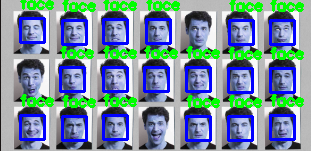

In [101]:
model_image
